# Gaussian Naive Bayes
### Assumption that data collected at every label level is Gaussian



In [66]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
from sklearn.datasets import make_blobs


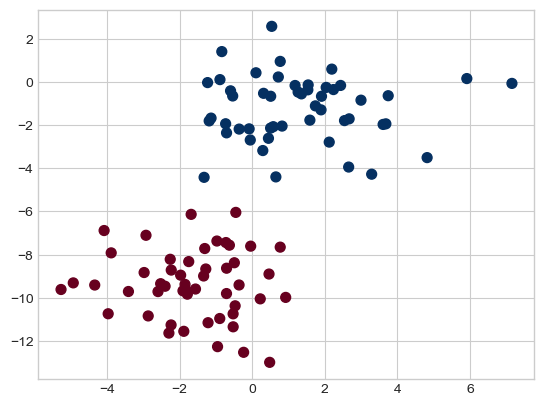

In [7]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
model=GaussianNB()
model.fit(X,y)

GaussianNB()

In [25]:
#creating new data to predict the model
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)#determines the shape of the returned value
ynew = model.predict(Xnew)
print(Xnew.shape)
print(ynew.shape)
Xnew[-8:]
ynew[-8:]

(2000, 2)
(2000,)


array([0, 0, 0, 0, 0, 0, 1, 1])

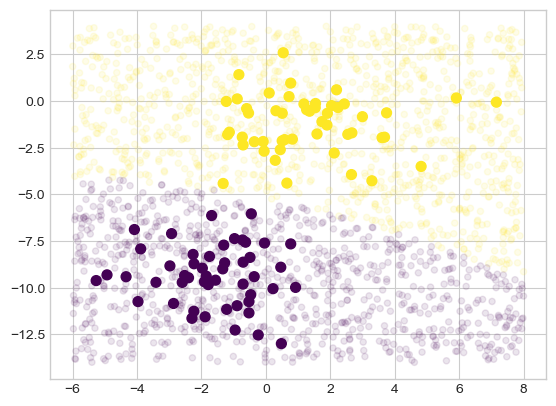

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');
plt.scatter(Xnew[:,0],Xnew[:,1],s=20,c=ynew,cmap='viridis',alpha=0.1)
#Shows that the new data also falls in the previous division boundary

In [19]:
yprob = model.predict_proba(Xnew)


In [21]:
yprob[-8:].round(2)
#how to read it?
#Here rows corresponds to samples whereas columns corresponds to each class
#in first row,89%that it belongs to class 0 and 11% that it belongs to 1
#all the rest ,100% belongs to class 0

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## Multinomial Naive Bayes

Features are ssumed to be developed from multinomial distribution
Lets classify text using Multinomial Naive Bayes

In [29]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names #various classes that they can be classified into

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [30]:
#selecting only few classes for simplicity
categories = ['talk.religion.misc', 'soc.religion.christian',
                      'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [31]:
print(train.data[5][48:])#item no 5,lines in this case from 48 to the last

Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

Parameters for make_pipeline

*steps : list of Estimator objects
    List of the scikit-learn estimators that are chained together.
    Here vectorization is performed first and then the NaiveBayes

In [54]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
label=model.predict(test.data)
print(label.shape,test.target.shape)

(1432,) (1432,)


In [37]:
#Now that our Multino Naiva Bayes has predicted the labels,lets see how well it did using 
#confusion matrix

In [71]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,label)
print(mat)

[[344  13  32   0]
 [  6 364  24   0]
 [  1   5 392   0]
 [  4  12 187  48]]


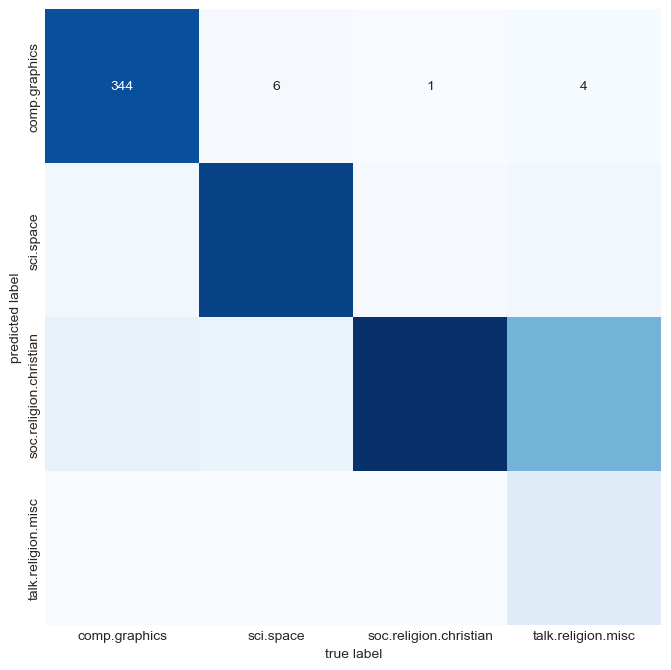

In [68]:
#plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                     xticklabels=train.target_names, yticklabels=train.target_names,
                     cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [52]:
np.unique(test.target)
np.unique(label)

array([0, 1, 2, 3])